## Force Index

Force Index는 알렉산더 엘더(Alexander Elder)에 의해 개발된 기술적 분석 도구로, 가격 변동과 거래량의 변화를 결합하여 주식의 방향성과 강도를 평가하는 데 사용된다. 이 지표는 주식의 매수 또는 매도 힘을 측정하며, 추세의 시작과 끝을 감지하는 데 도움을 준다.

Force Index는 다음 공식을 사용하여 계산된다:

$$\mbox{Force Index}_t = (C_t - C_{t-1}) \times V_t$$

여기서 $C$는 종가, $V$는 거래량이며, $t$는 시점을 나타낸다. 이 수식은 가격 변동의 크기와 그 날의 거래량을 곱하여, 가격 변동에 대한 거래량의 영향을 측정한다. 결과값이 양수인 경우, 매수 힘이 강함을 의미하고, 결과값이 음수인 경우, 매도 힘이 강함을 나타낸다.

Force Index는 단기(일간), 중기(13일 이동 평균) 및 장기(26일 이동 평균) 트렌드 분석에 사용될 수 있다. 이동 평균을 적용함으로써 지표를 부드럽게 하여 더 명확한 추세 신호를 제공한다. 예를 들어, 13일 이동 평균을 적용한 Force Index는 중기적인 가격 변동의 강도를 보여주며, 이는 잠재적인 추세 반전 또는 지속을 나타낼 수 있다.

이 지표는 특히 가격의 상승 또는 하락 추세가 거래량 증가와 함께 발생할 때 유용하다. 가격이 상승하면서 Force Index가 긍정적으로 증가하면 강세 시장을, 가격이 하락하면서 Force Index가 부정적으로 증가하면 약세 시장을 의미한다. 반대로, Force Index가 감소하면서 가격이 상승하거나, Force Index가 증가하면서 가격이 하락하는 경우는 주의를 요하는 신호로 간주될 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import force_index
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
fi_short = force_index(
    close = data['Close'],
    volume = data['Volume'],
    window = 13,
    fillna = False
)

In [5]:
fi_long = force_index(
    close = data['Close'],
    volume = data['Volume'],
    window = 26,
    fillna = False
)

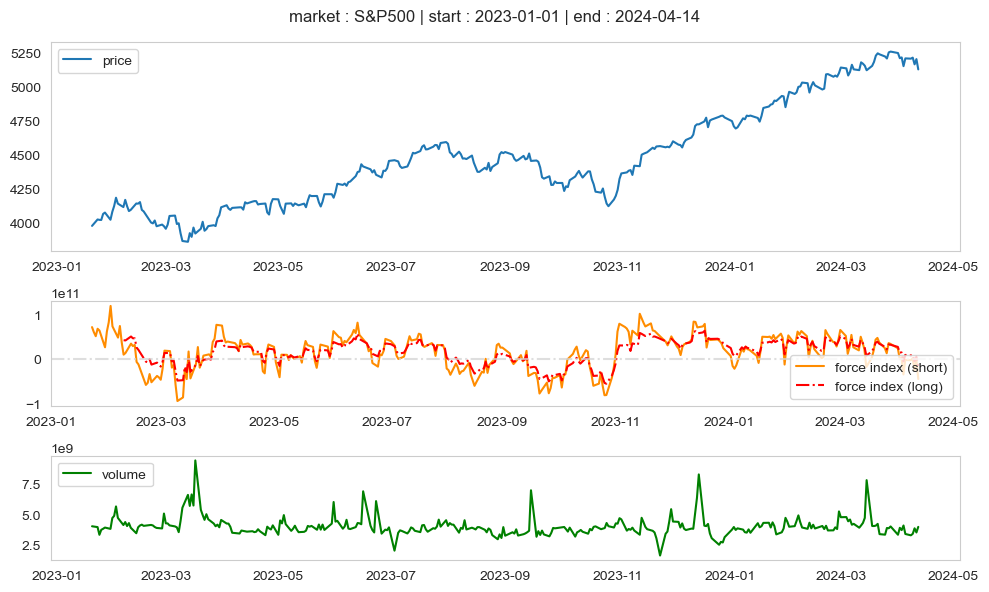

In [8]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][12:])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(fi_short, color = 'darkorange')
plt.plot(fi_long, color = 'red', ls = '-.')
plt.grid(False)
plt.axhline(y = 0, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['force index (short)', 'force index (long)'])

plt.subplot(gs[2])
plt.plot(data['Volume'][12:], color = 'green')
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()